In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os

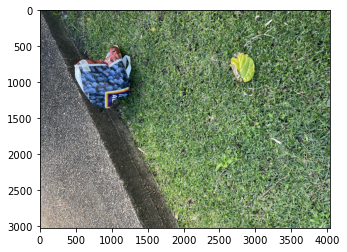

In [2]:
img = image.load_img("dataset/images/training/plasticbags/IMG_0770.jpeg")
plt.imshow(img)

In [3]:
cv2.imread("dataset/images/training/plasticbags/IMG_0770.jpeg").shape

(4032, 3024, 3)

In [4]:
training = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [13]:
training_dataset = training.flow_from_directory("dataset/images/training/",
                                               target_size = (200, 200),
                                               batch_size = 6,
                                               class_mode = "categorical")

validation_dataset = validation.flow_from_directory("dataset/images/validation/",
                                               target_size = (200, 200),
                                               batch_size = 6,
                                               class_mode = "categorical")

Found 46 images belonging to 4 classes.
Found 46 images belonging to 4 classes.


In [6]:
training_dataset.class_indices

{'noplastic': 0, 'otherplastic': 1, 'plasticbags': 2, 'plasticbottles': 3}

In [7]:
training_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [8]:
model = Sequential() 
model.add(Conv2D(16, (3, 3), input_shape = (200, 200, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(32, (3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Conv2D(64, (3, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(512)) 
model.add(Activation('relu')) 
model.add(Dense(4)) 
model.add(Activation('softmax')) 

In [9]:
model.compile(loss = "categorical_crossentropy",
             optimizer = "RMSprop",
              metrics = ["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
activation (Activation)      (None, 198, 198, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
activation_1 (Activation)    (None, 97, 97, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        1

In [10]:
history = model.fit(training_dataset,
                     steps_per_epoch = 3,
                     epochs = 50,
                     validation_data = validation_dataset,
                     verbose = 1)

Epoch 1/50
3/3 [==============================] - 24s 5s/step - loss: 17.5938 - accuracy: 0.5139 - val_loss: 5.8046 - val_accuracy: 0.1957
Epoch 2/50
3/3 [==============================] - 10s 5s/step - loss: 4.6478 - accuracy: 0.2500 - val_loss: 1.4307 - val_accuracy: 0.3043
Epoch 3/50
3/3 [==============================] - 10s 5s/step - loss: 1.3791 - accuracy: 0.3333 - val_loss: 1.4244 - val_accuracy: 0.3478
Epoch 4/50
3/3 [==============================] - 11s 5s/step - loss: 1.4952 - accuracy: 0.1528 - val_loss: 1.2806 - val_accuracy: 0.4348
Epoch 5/50
3/3 [==============================] - 11s 5s/step - loss: 1.3396 - accuracy: 0.4306 - val_loss: 1.2443 - val_accuracy: 0.5870
Epoch 6/50
3/3 [==============================] - 10s 5s/step - loss: 1.4761 - accuracy: 0.3056 - val_loss: 1.5927 - val_accuracy: 0.4783
Epoch 7/50
3/3 [==============================] - 10s 5s/step - loss: 3.2209 - accuracy: 0.8869 - val_loss: 2.2518 - val_accuracy: 0.4348
Epoch 8/50
3/3 [=================

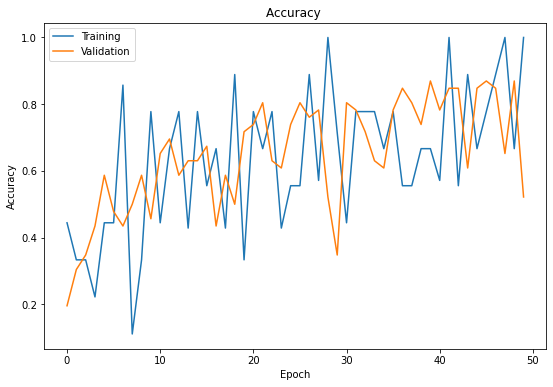

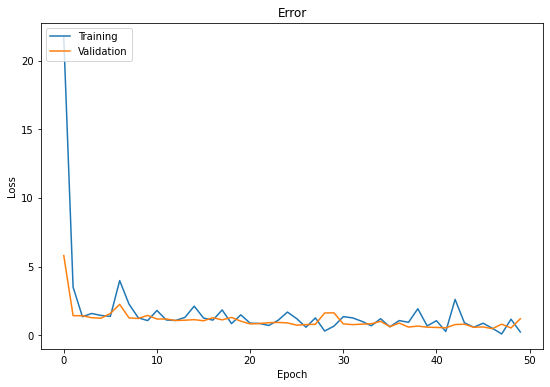

In [11]:
plt.rcParams['figure.figsize'] = (9,6)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title( "Accuracy ")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
plt.close()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Error")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()
plt.close()

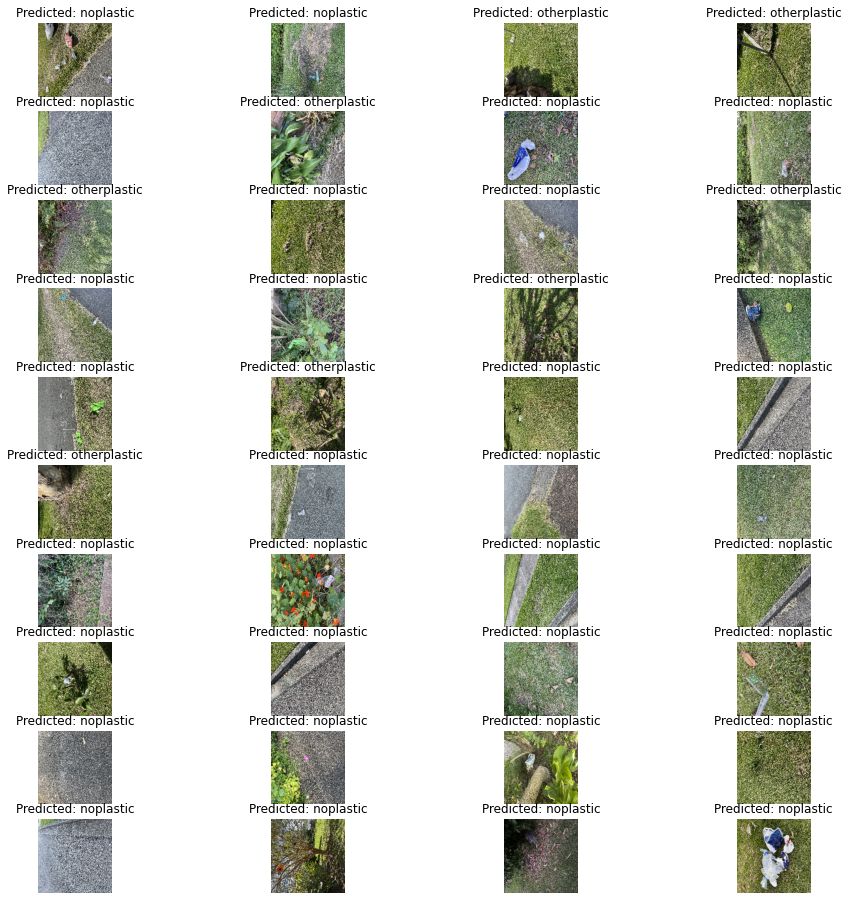

In [12]:
%matplotlib inline

plt.rcParams["figure.figsize"] = (16,16) 
base_path = "dataset/images/test/"

classes = {0:"noplastic", 1:"otherplastic", 2: "plasticbags", 3: "plastic bottles"} 
test_files = []

for x in os.listdir(base_path): 
    if (x.endswith('.jpeg')):
        test_files.append(x)

for i,x in enumerate(test_files):
    img = image.load_img(base_path + x, target_size=(200, 200)) 
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    output = model.predict(x)
    plt.subplot(10,4,i+1)
    plt.imshow(img)
    plt.title("Predicted: {}".format(classes[int(output[0][0])]))
    plt.axis('off')
